# XXIV. HUFFMAN CODES 

A greedy algorithm used for constructing a certain kind of prefix-free binary codes know as Huffman codes.

### Binary Codes
So a binary code is just a way to write down symbols from some general alphabet in a manner that computers can understand. That is, it's just a function mapping each symbol from an alphabet, capital sigma, to a binary string, a sequence of zeroes and ones.

    Let   A, B, C, D   ∈  Σ

So this alphabet capital sigma could be any number of things but, you know, as a simple example, you could imagine it's the letters a through z, say in lowercase, plus maybe the space character and some punctuation. So maybe, for a set of size 32 overall. And if you have 32 symbols you need to encode in binary, well, an obvious way to do it is, there happens to be 32 different binary strings of length five, so why not just use one of each of those for your symbols.

So this would be a fixed length code, in the sense we're using the exactly the same number of bits, namely five, to encode each of the symbols of our alphabet. This is pretty similar to what's going on with ASCII codes.

### Ambiguity
So a new issue arises when you pass from fixed-length codes to variable length codes. So let me illustrate that with a simple example. Suppose our alphabet sigma is just four characters, A, B, C, D. So the obvious fixed length encoding of these characters would just be 00, 01, 10, and 11. 

    A, B, C, D = {00, 01, 10, 11}
 
Well, suppose you wanted to use fewer bits, and wanted to use a variable length encoding, an obvious idea would be to try to get away with only one bit for a couple of these characters. So, suppose instead of using a double 0 for A, we just use a single 0. And instead of using a double one for D we just use a single one.

    A, B, C, D = {0, 01, 10, 1}

So that's only fewer bits. So that seems like that can only be better. But now, here's the question. Suppose, someone handed you an encoded transmission consisting of the digits 001. What would have been the original sequence of symbols that led to that encoded version? 

There is not enough information to know what 001 was supposed to be an encoding of. AB and AAD both would give you 001.


### Prefix-Free Codes

So lest you think this is too strong a property, certainly interesting and useful variable length codes exist that satisfy the prefix-free property. So one simple example, again just to encode the letters A, B, C, D. We can get away with encoding the symbol A just using a single bit, just using a zero. Now, of course, to be prefix free, it better be the case that our encodings of B and C and D all start with the bit 1. Otherwise we're not prefix free. But we can get away with that, so let's encode a B with a one and then a zero, and now both C and D better have the property that they start neither with 0 nor with 10. That is, they better start with 11, but let's just encode c using 110 and D using 111. So that would be a variable length code. The number of bits varies between one and three, but it is prefix free. And again, the reason we might want to do this, the reason we might want to use a variable-length encoding, is to take advantage of non-uniform frequencies of symbols from a given alphabet. 

    A, B, C, D = {0, 10, 110, 111}

So let's continue with just our four-symbol alphabet, A, B, C, and D.<br>
And let's suppose we have good statistics in our application domain about exactly how frequent each of these symbols are. So, in particular, let's assume we know that A is by far the most likely symbol. Let's say 60% of the symbols are going to be As, whereas 25% are Bs, 10% are Cs, and 5% are Ds. 

    frequent(A, B, C, D) = {60%, 25%, 10%, 5%}

So why would you know the statistics? Well, in some domains you're just going to have a lot of expertise. In genomics you're going to know the usual frequencies of As, Cs, Gs and Ts. For something like an mp3 file, well, you can literally just take an intermediate version of the file after you've done the analog to digital transformation, and just count the number of occurrences of each of the symbols. And then you know exact frequencies, and then you're good to go. So let's compare the performance of the obvious fixed length code, where we used 2 bits for each of the 4 characters, with that of the variable length code that's also prefix-free that we mentioned on the previous slide. And we're going to measure the performance of these codes by looking, on average, how many bits do you need to encode a character. Where the average is over the frequencies of the four different symbols?

    Fixed-length encoding = 2 bits / character
    Variable-length encoding = 1.55 bits / character
    
So for the fixed-length encoding, of course, it's two bits per symbol. We don't even need the average. Just whatever the symbol is, it uses exactly two bits.<br>
On average, for an average character, given these frequencies of the different symbols, variable length encoding  requires 1.55 bits per character. Well, 60% of the time, it's going to use only 1 bit, and that's where the big savings comes from. 1 bit is all that's needed whenever we see an A, and most of the characters are As. We don't do too bad when we see a B either, which is 25% of the time. We're only using 2 bits for each B.
Now it is true that Cs and Ds, we're paying a price. We've having to use 3 bits for each of those, but there aren't very many. Only 10% of the time is it a C and 5% of the time is it a D. And if you add up the result, that's taking the average over the simple frequencies, we get the result of 1.55.



###  Prefix-Free Codes:   Problem Definition 
There's clearly this opportunity to design binary prefix-free codes which improve over the obvious fixed link solution. So, we'd like to have in some sense, optimal algorithm for this problem and for that, we of course need a crisp problem definition. So, to do that it turns out to be useful to think of codes as binary trees. 

                                      binary codes   <--->   binary trees
![binary codes   <--->   binary trees](images/6_binarycodes_binarytree.png)




So in general, any binary code can be expressed as a tree in this way, with the left-child pointers being labeled with 0's, the right child pointers being labeled with 1's, and the various nodes being labeled the symbols of the given alphabets, and the bits from the root down to the node labeled with the given symbol corresponding to the proposed encoding for that symbol.

And what's cool about thinking about codes as trees is that the really important prefix-free condition, which seems like a nuisance to check in the abstract, shows up in a really clean way in these trees, namely the prefix-free condition is the same as leaves being the only nodes that have labels. No internal nodes are allowed to have a label in a prefix-free code. The reason for this is that we've set it up so that the encodings correspond to the bits along paths from the root to thelabeled node. So being a prefix of another corresponds to one node being an ancestor of the other, and so, if all the labels are at the leaves, then of course nobody is an ancestor of the other and we have no prefixes. 

A final important point about this correspondence is that the encoding lengths of the symbols, the number of bits needed to encode the various symbols, are just the depths of the corresponding leaves in the tree that corresponds to the code. 

    If  T = tree with leaves <--> symbols of Σ
    Then summation over Σ to take the average
    
        L(T) = Σ p_i * (depth of i in T)


 Huffman used bottom up approach. Not only are we going to get optimal codes, but we're going to get the blazingly fast greedy algorithm that constructs them. So what do I mean by bottom up? I mean we're going to start with just a bunch of nodes, each one labelled with one symbol of the alphabet. So, in effect, we're starting with the leaves of our tree. And then we're going to do successive mergers. We're going to take at each step two sub-trees thus far and link them together as sub-trees under a common internal node.
 
Which pairs of symbols are "safe" to merge?<br>
If we just wanted to make a myopic decision, that looks good right now, how would we even do that? What's our greedy criteria that's going to guide us to merge a particular pair of trees together? So what are the ramifications when we merge two subtrees, each containing a collection of symbols? Well, when we merge two subtrees, we introduce a new internal node which unites these two subtrees under them, and if you think about it, at the end of the day on the final tree, this is yet another internal node that's going to be on the root to leaf path, for all of the leaves in these two sub trees. That is, if you're a symbol and you're watching your subtree get merged with somebody else then that's another bit in my encoding. That's yet one more node I have to pass through to get back to the root.  And remember the consequences of a merge is going to be an increase in the encoding length by one bit, whichever two symbols we're going to pick. Now we want to do is minimize the average encoding length with respect to the frequencies that were given. So which pair of symbols are we the least unhappy to suffer an increment to their encoding length, was going to be the symbols that are the least frequent. 

![binary codes   <--->   binary trees](images/7_HuffmansGreedyAlgorithm.png)


### Huffman's Algorithm
So how does the algorithm work in general? Well just as you'd expect given the discussion on this concrete example. I'm going to take as the base case when the alphabet has just two symbols, in that case the only thing to do is encode one with a zero, the other with a one.

Otherwise, we take the two symbols of the alphabet that have the smallest frequencies. You can break ties arbitrarily, it's not going to matter, it's going to be optimal either way.

We then replace these two low frequency symbols A and B with meta symbol AB, intended to represent both of them in some sense. As we just discussed with those semantics, we should be defining the frequency of the meta symbol AB as the sum of the frequencies of the symbols that it comprises. We now have a well defined, smaller sub problem. It has one fewer symbol than the one we were given. So, we can recursively compute a solution for it. So, what the recursive call returns is a tree who's leaves are in one to one correspondence with sigma prime. That is, it does not have a leaf labeled A, it does not have a leaf labeled B. It does have a leaf labeled AB, so we want to extend to this tree T prime to be one who's leaves correspond to all of sigma. And the obvious way to do that is to split the leaf labeled AB, replace that with a new internal unlabeled node with two children which are labeled A and B. The resulting tree capital T with leaves and correspondents to the original alphabet sigma is then the final output of Huffman's Algorithm.



sigma ['A', 'B', 'C', 'D', 'E', 'F'], heap [[2, 'B'], [2, 'E'], [6, 'C'], [8, 'D'], [3, 'A'], [6, 'F']]

sigma ['A', 'C', 'D', 'F', 'BE'], heap [[3, 'A'], [4, 'BE'], [6, 'C'], [8, 'D'], [6, 'F']]

sigma ['C', 'D', 'F', 'ABE'], heap [[6, 'C'], [6, 'F'], [8, 'D'], [7, 'ABE']]

sigma ['D', 'ABE', 'CF'], heap [[7, 'ABE'], [8, 'D'], [12, 'CF']]

sigma ['CF', 'ABED'], heap [[12, 'CF'], [15, 'ABED']]

[['CFABED', 'CF', 'C'], {'weight': '00'}, ['CFABED', 'CF', 'F'], {'weight': '01'}, ['CFABED', 'ABED', 'ABE', 'A'], {'weight': '100'}, ['CFABED', 'ABED', 'ABE', 'BE', 'B'], {'weight': '1010'}, ['CFABED', 'ABED', 'ABE', 'BE', 'E'], {'weight': '1011'}, ['CFABED', 'ABED', 'D'], {'weight': '11'}]


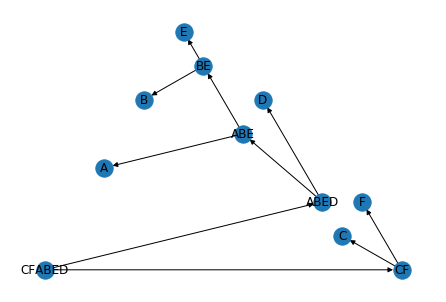

In [38]:
%matplotlib inline
import networkx as nx
import heapq
import numpy as np
from matplotlib import pyplot as plt
import copy 

def huffmans_code(sigma, heap):
    print("sigma {}, heap {}\n".format(sigma, heap))
    if len(sigma) == 2:
        T = nx.DiGraph()
        meta_symbol = ''.join([sigma[0], sigma[1]])
        T.add_weighted_edges_from([(meta_symbol, sigma[0], 0), (meta_symbol, sigma[1], 1)])
        return T
    #sigma_prime = copy.deepcopy(sigma)
    smallest = heapq.heappop(heap)
    smallest2 = heapq.heappop(heap)
    meta_symbol = ''.join([smallest[1], smallest2[1]])
    sigma.remove(smallest[1])
    sigma.remove(smallest2[1])
    sigma.append(meta_symbol)
    p_ab = smallest[0] + smallest2[0]
    heapq.heappush(heap,[p_ab, meta_symbol])
    T = huffmans_code(sigma, heap)
    T.add_weighted_edges_from([(meta_symbol, smallest[1], 0), (meta_symbol, smallest2[1], 1)])
    return T
    
    
def huffmans_code_heap(sigma, weight):
    input_dict = {sigma[i] : weight[i] for i in range(len(sigma))}
    heap = [[value, key] for key,value in input_dict.items()]
    heapq.heapify(heap)
    T = huffmans_code(sigma, heap)
    nx.draw_planar(T, with_labels = True)
    roots = (v for v, d in T.in_degree() if d == 0)
    leaves = [v for v, d in T.out_degree() if d == 0]
    all_paths = []
    for root in roots:
        paths = nx.all_simple_paths(T, root, leaves)
        for path in paths:
            pathcode = ''
            for i in range(len(list(path))-1):
                pathcode += str(T[path[i]][path[i+1]]['weight'])
            all_paths.extend([path, {'weight': pathcode}])
    print(all_paths)


#huffmans_code_heap(['A', 'B'], [3, 2])
huffmans_code_heap(['A', 'B', 'C', 'D', 'E', 'F'], [3, 2, 6, 8, 2, 6])



sigma ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], heap [[1, 'L'], [2, 'B'], [3, 'A'], [4, 'I'], [2, 'E'], [6, 'C'], [7, 'G'], [8, 'H'], [8, 'D'], [2, 'J'], [9, 'K'], [6, 'F']]

sigma ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'LB'], heap [[2, 'E'], [2, 'J'], [3, 'A'], [4, 'I'], [3, 'LB'], [6, 'C'], [7, 'G'], [8, 'H'], [8, 'D'], [9, 'K'], [6, 'F']]

sigma ['A', 'C', 'D', 'F', 'G', 'H', 'I', 'K', 'LB', 'EJ'], heap [[3, 'A'], [3, 'LB'], [6, 'C'], [4, 'I'], [4, 'EJ'], [9, 'K'], [7, 'G'], [8, 'H'], [8, 'D'], [6, 'F']]

sigma ['C', 'D', 'F', 'G', 'H', 'I', 'K', 'EJ', 'ALB'], heap [[4, 'EJ'], [4, 'I'], [6, 'C'], [6, 'ALB'], [6, 'F'], [9, 'K'], [7, 'G'], [8, 'H'], [8, 'D']]

sigma ['C', 'D', 'F', 'G', 'H', 'K', 'ALB', 'EJI'], heap [[6, 'ALB'], [6, 'F'], [6, 'C'], [8, 'D'], [8, 'H'], [9, 'K'], [7, 'G'], [8, 'EJI']]

sigma ['D', 'F', 'G', 'H', 'K', 'EJI', 'ALBC'], heap [[6, 'F'], [8, 'D'], [7, 'G'], [8, 'EJI'], [8, 'H'], [9, 'K'], [12, 'ALBC']]

sigma ['D', 'H', 'K', 'E

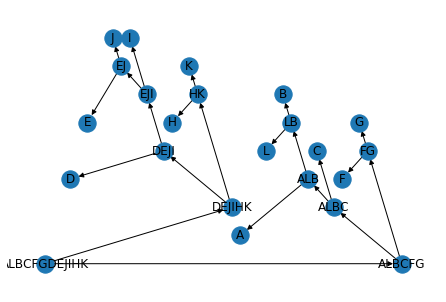

In [39]:
huffmans_code_heap(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'], [3, 2, 6, 8, 2, 6, 7, 8, 4])



# XXV. INTRODUCTION TO DYNAMIC PROGRAMMING 
Indeed, even more than usual, the dynamic programming paradigm takes practice to perfect. People find it counterintuitive at first, and they often struggle to apply the paradigm to problems that they haven's seen before. But here's the good news, dynamic programming is relatively formulaic,certainly more so than our recent study of greedy algorithms, and it's something that you can get a hang of. 

And the key approach in this new paradigm is to first reason about the structure of an optimal solution.
So in fact, in much of our discussion of both divide and conquer and greedy algorithms, this kind of reasoning was implicit. With dynamic programming, we're going to make it systematic. For example, implicit in the correctness of many of divide and conquer algorithm is the fact that an optimal solution to the whole problem has to be expressible, has to be constructable in a prescribed way from solutions to smaller sub-problems. So, what's the motivation for doing thisthought experiment, trying to understand what the optimal solution could possibly look like? Well, the plan is we're going to narrow the possible candidates for the optimal solution down to a relatively small set of candidates. With a small set, we can get away with brute force search to pick the best one. So, one lesson you learn once you get good at dynamic programming, is that it's not at all circular to reason about the very object that you're trying to compute.

### Max weight independent set problem using Dynamic programming
In this problem, we're going to restrict our attention merely to path graphs.  That's graphs that consist solely of a path on some number n of vertices. The only other part of the input is a single non-negative number per vertex. We're going to call these weights. The responsibility of the algorithm is going to be to output an independent set. So in the context of a simple path graph, it just means you gotta return some of the vertices and always avoiding consecutive pairs of vertices. That's the max weight independence set problem.

There's only two possibilities for what the optimal solution could possibly look like, in terms of optimal solutions of smaller sub problems. So, a corollary of this is that if a little birdie told us which case we were in, whether or not V sub n, V sub n was in the optimal solution, we could just complete this by recursing on the appropriate sub-problem. The little birdie tells us the optimal solution doesn't have Vn we just recurse on G prime. If the little birdie tells us v sub n is in the optimal solution, we recurse on G double prime and then add V sub n to the result. Now, of course, there is no little birdie and we have no idea whether this right-most vertex is in the optimal solution or not. But hey, there is only two possibilities, right? Here is an idea. Maybe it seems crazy, but why not try both possibilities and just return whichever one is better? Why do I suggest that maybe this is crazy? Well, if you stare at this and you think about it and you think about the ramifications of trying both possibilities as you recursed down the graph, this may start feeling a little bit like brute force search. And, in fact it is. This is just a recursive organization of a brute force search. Nevertheless, as we'll see in the next video, if we're smart about eliminating redundancy, we can actually implement this idea in a linear time.

So while this kind of recursive algorithm, follows the template of divide and conquer pretty much exactly. the running time is blown up to exponential. And the reason for that difference is, in our divide an conquer algorithms, think of Merge Sort as a canonical example, we made a ton of progress before we recursed. Right? We threw out half of the array, 50% of the stuff before we bothered with any recursion. How much progress are we making in this algorithm? Well, very little. It's positive progress, but very small. We throw out either one or two vertices out of maybe this graph with say a million vertices before recursing. So we're branching by a factor two and making very little progress before each branch. That's why we give this exponential running time rather than something more in the neighborhood of n log n. 

    But the number of distinct problems we can solve is uperbounded by O(n)

From this, we conclude that the exponential running time of the previous algorithm arises solely from the spectacular redundancy of solving exactly the same sub-problem from scratch, over and over and over and over again. 

 So an obvious way to speed up this algorithm, to speed it up dramatically is to simply cache the results of a sub-problem the first time you see it. Then you can look it up in some array, constant time, at any point later on in the algorithm. There is a word for this, I won't really use it in this class, but just so you that know what it is, it's called *memoization*.

Now when you do a recursive call and you're handed the first I vertices of the graph, and again remember that we know that the sub-problem has to look like the first I vertices of the graph for sub I. You check the array, if it's already been filled in, if you already know the answer, great. You just return it and count the time, you don't bother to resolve. If this is the first time you've ever seen. this sub problem then you recurse and you solve it, as as we saw, as we suggested in the previous slot. So with this simple memoization fixed, this action, this algorithm is linear time. 

### Principles of Dynamic programming
So the first property that you want yourcollection of subproblems to possess is it shouldn't be too big. It shouldn't have too many different subproblems. The reason being is, in the best case scenario, you're going to be spendingconstant time solving each of those subproblems, so the number of subproblems is a lower bound than the running time of your algorithm. Now, in the Maximum Independent Set example, we did great. We had merely a linear number of subproblems, and we did indeed get away with a mere constant work for each of those subproblems, giving us our linear running time bound overall. 

The second property you want and this one's really the kicker, is there should be a notion of smaller subproblems and larger subproblems. In the context of independence sets of path graphs this was really easy to understand. The subproblems were prefixes of the original graph and the more vertices you had, the bigger the subproblem. So in general, in dynamic programming, you systematically solve all of the subproblems beginning with the smallest ones and moving on to larger and larger subproblems. And for this to work, it better be the case that, at a given subproblem. Given the solutions to all of the smaller sub problems it's easier to confer what the solution to the current sub problem is. That is solutions to previous sub problems are sufficient to quickly and correctly compute the solution to the current sub problem.

So the third property, you probably won't have to worry about much. Usually this just takes care of itself. But needless to say, after you've done the work of solving all of your sub problems, you better be able to answer the original question. This property is usually automatically satisfied because in most cases, not all, but in most cases the original problem is simply the biggest of all of your subproblems. Notice this is exactly how things worked in the independent sets. Our biggest subproblem G sub N was just the original graph. So once we fill up the whole table, boom. Waiting for us in the final entry was the desired solution to the original problem.


